In [9]:
import pandas as pd
from sklearn import preprocessing

from gnnad.graphanomaly import GNNAD
from gnnad.plot import plot_test_anomalies, plot_predictions, plot_sensor_error_scores

def normalise(X, scaler_fn):
    scaler = scaler_fn.fit(X)
    return pd.DataFrame(scaler.transform(X), index=X.index, columns = X.columns)

In [2]:
# read in training data
X_train = pd.read_csv('./examples/herbert_train.csv', index_col=0)
X_train.index = pd.to_datetime(X_train.index)

# read in test data
X_tmp = pd.read_csv('./examples/herbert_test.csv', index_col=0)
X_tmp.index = pd.to_datetime(X_tmp.index)
X_test = X_tmp.iloc[:,:8]
y_test = X_tmp.iloc[:,8:].apply(any, axis=1)

# normalise
X_test = normalise(X_test, preprocessing.StandardScaler())
X_train = normalise(X_train, preprocessing.StandardScaler())

# create ANOOMS dict for plotting
ANOMS = {'type1': {}}
X_test_anoms = X_tmp.iloc[:,8:]

for i in range(len(X_test_anoms.columns)):
    anom_col_name = X_test_anoms.columns[i]
    sensor_col_name = X_test.columns[i]
    anom_idxs = X_test_anoms[anom_col_name][X_test_anoms[anom_col_name]].index

    if len(anom_idxs) > 0:
        ANOMS['type1'][sensor_col_name] = anom_idxs

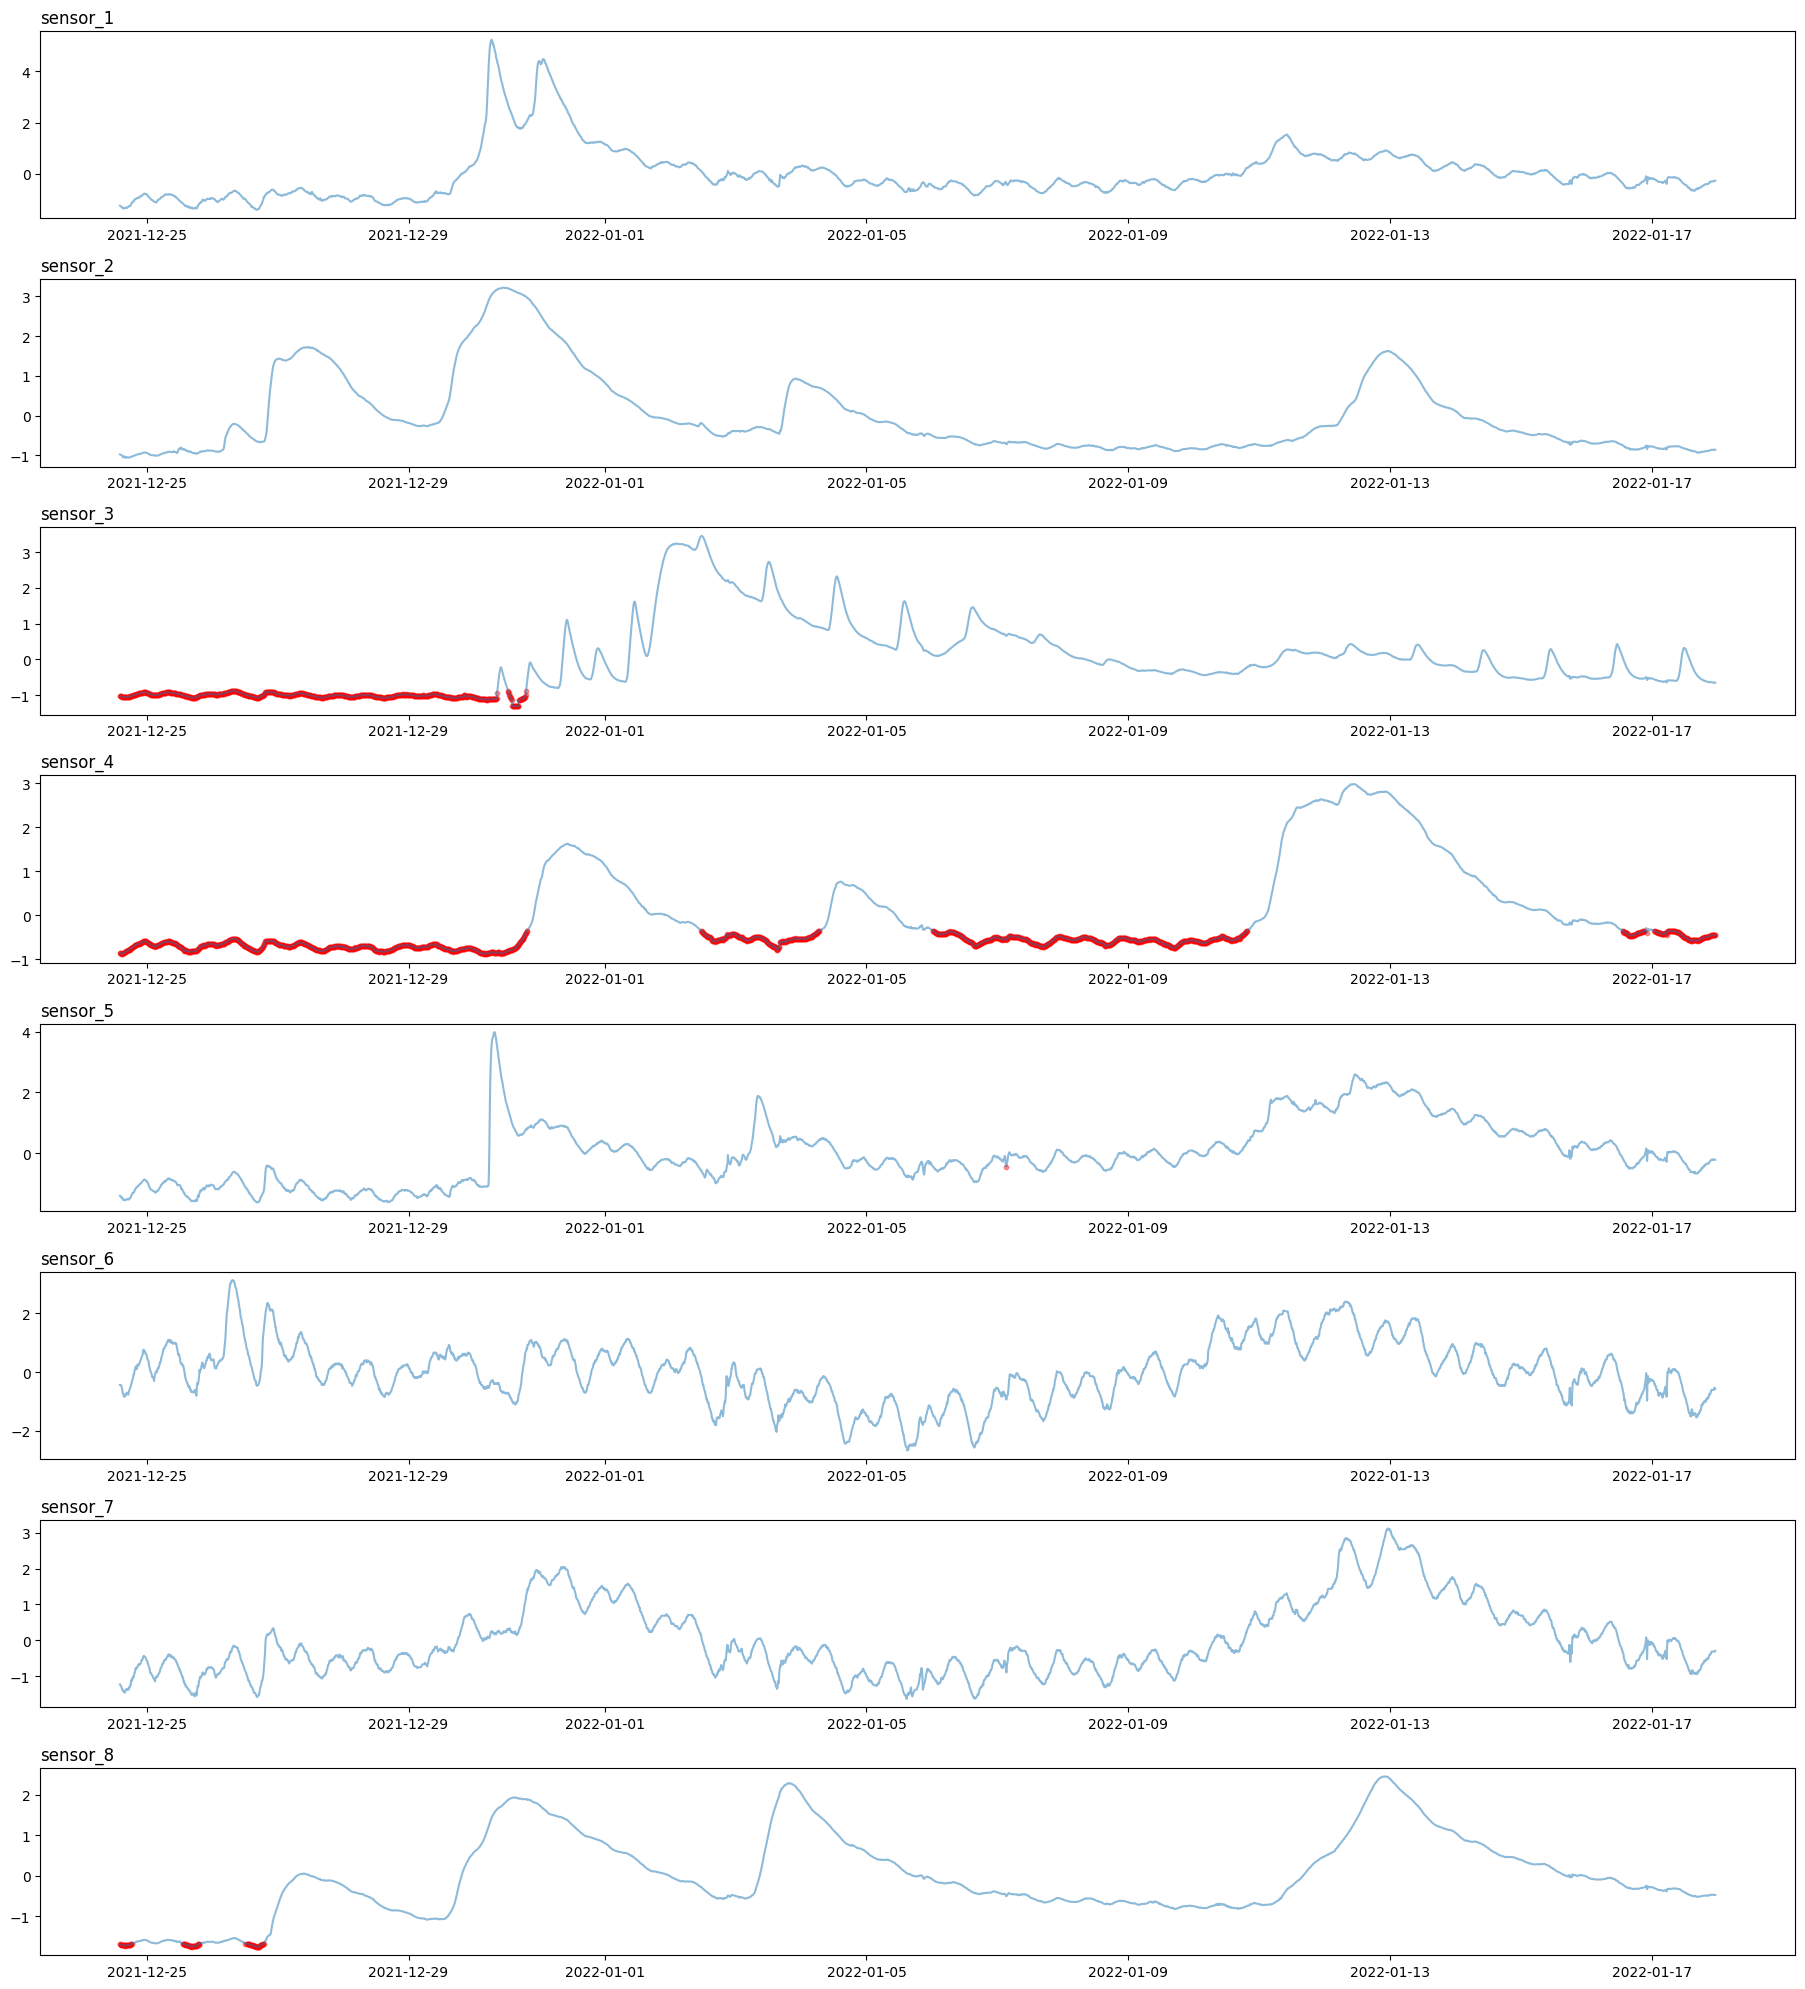

In [3]:
# plot input data
plot_test_anomalies(X_test, ANOMS)

In [4]:
# run model
model = GNNAD(threshold_type="max_validation", topk=6, slide_win=200)
fitted_model = model.fit(X_train, X_test, y_test)


epoch (0 / 100) (Loss:0.61486878, ACU_loss:11.06763801)
epoch (1 / 100) (Loss:0.31875921, ACU_loss:5.73766573)
epoch (2 / 100) (Loss:0.29581064, ACU_loss:5.32459144)
epoch (3 / 100) (Loss:0.26567188, ACU_loss:4.78209387)
epoch (4 / 100) (Loss:0.25205938, ACU_loss:4.53706883)
epoch (5 / 100) (Loss:0.23730964, ACU_loss:4.27157345)
epoch (6 / 100) (Loss:0.24096593, ACU_loss:4.33738682)
epoch (7 / 100) (Loss:0.22398415, ACU_loss:4.03171471)
epoch (8 / 100) (Loss:0.22403433, ACU_loss:4.03261800)
epoch (9 / 100) (Loss:0.23458646, ACU_loss:4.22255632)
epoch (10 / 100) (Loss:0.21544868, ACU_loss:3.87807630)
epoch (11 / 100) (Loss:0.21923439, ACU_loss:3.94621898)
epoch (12 / 100) (Loss:0.22424191, ACU_loss:4.03635441)
epoch (13 / 100) (Loss:0.20220285, ACU_loss:3.63965127)
epoch (14 / 100) (Loss:0.19798097, ACU_loss:3.56365749)
epoch (15 / 100) (Loss:0.18214025, ACU_loss:3.27852458)
epoch (16 / 100) (Loss:0.19318853, ACU_loss:3.47739351)
epoch (17 / 100) (Loss:0.19173861, ACU_loss:3.45129491)
e

In [5]:
# model summary
fitted_model.summary()

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
         Embedding-1                   [-1, 64]             512
         Embedding-2                   [-1, 64]             512
            Linear-3                   [-1, 64]          12,800
    SumAggregation-4                [-1, 1, 64]               0
        GraphLayer-5                   [-1, 64]              64
       BatchNorm1d-6                   [-1, 64]             128
              ReLU-7                   [-1, 64]               0
          GNNLayer-8                   [-1, 64]               0
         Embedding-9                   [-1, 64]             512
      BatchNorm1d-10                [-1, 64, 8]             128
          Dropout-11                [-1, 8, 64]               0
           Linear-12                 [-1, 8, 1]              65
         OutLayer-13                 [-1, 8, 1]               0
Total params: 14,721
Trainable params: 

In [6]:
# GDN+, sensor thresholds
preds = fitted_model.sensor_threshold_preds(tau = 99)
fitted_model.print_eval_metrics(preds)


recall: 30.4
precision: 59.3
accuracy: 49.7
specificity: 73.9
f1: 40.2


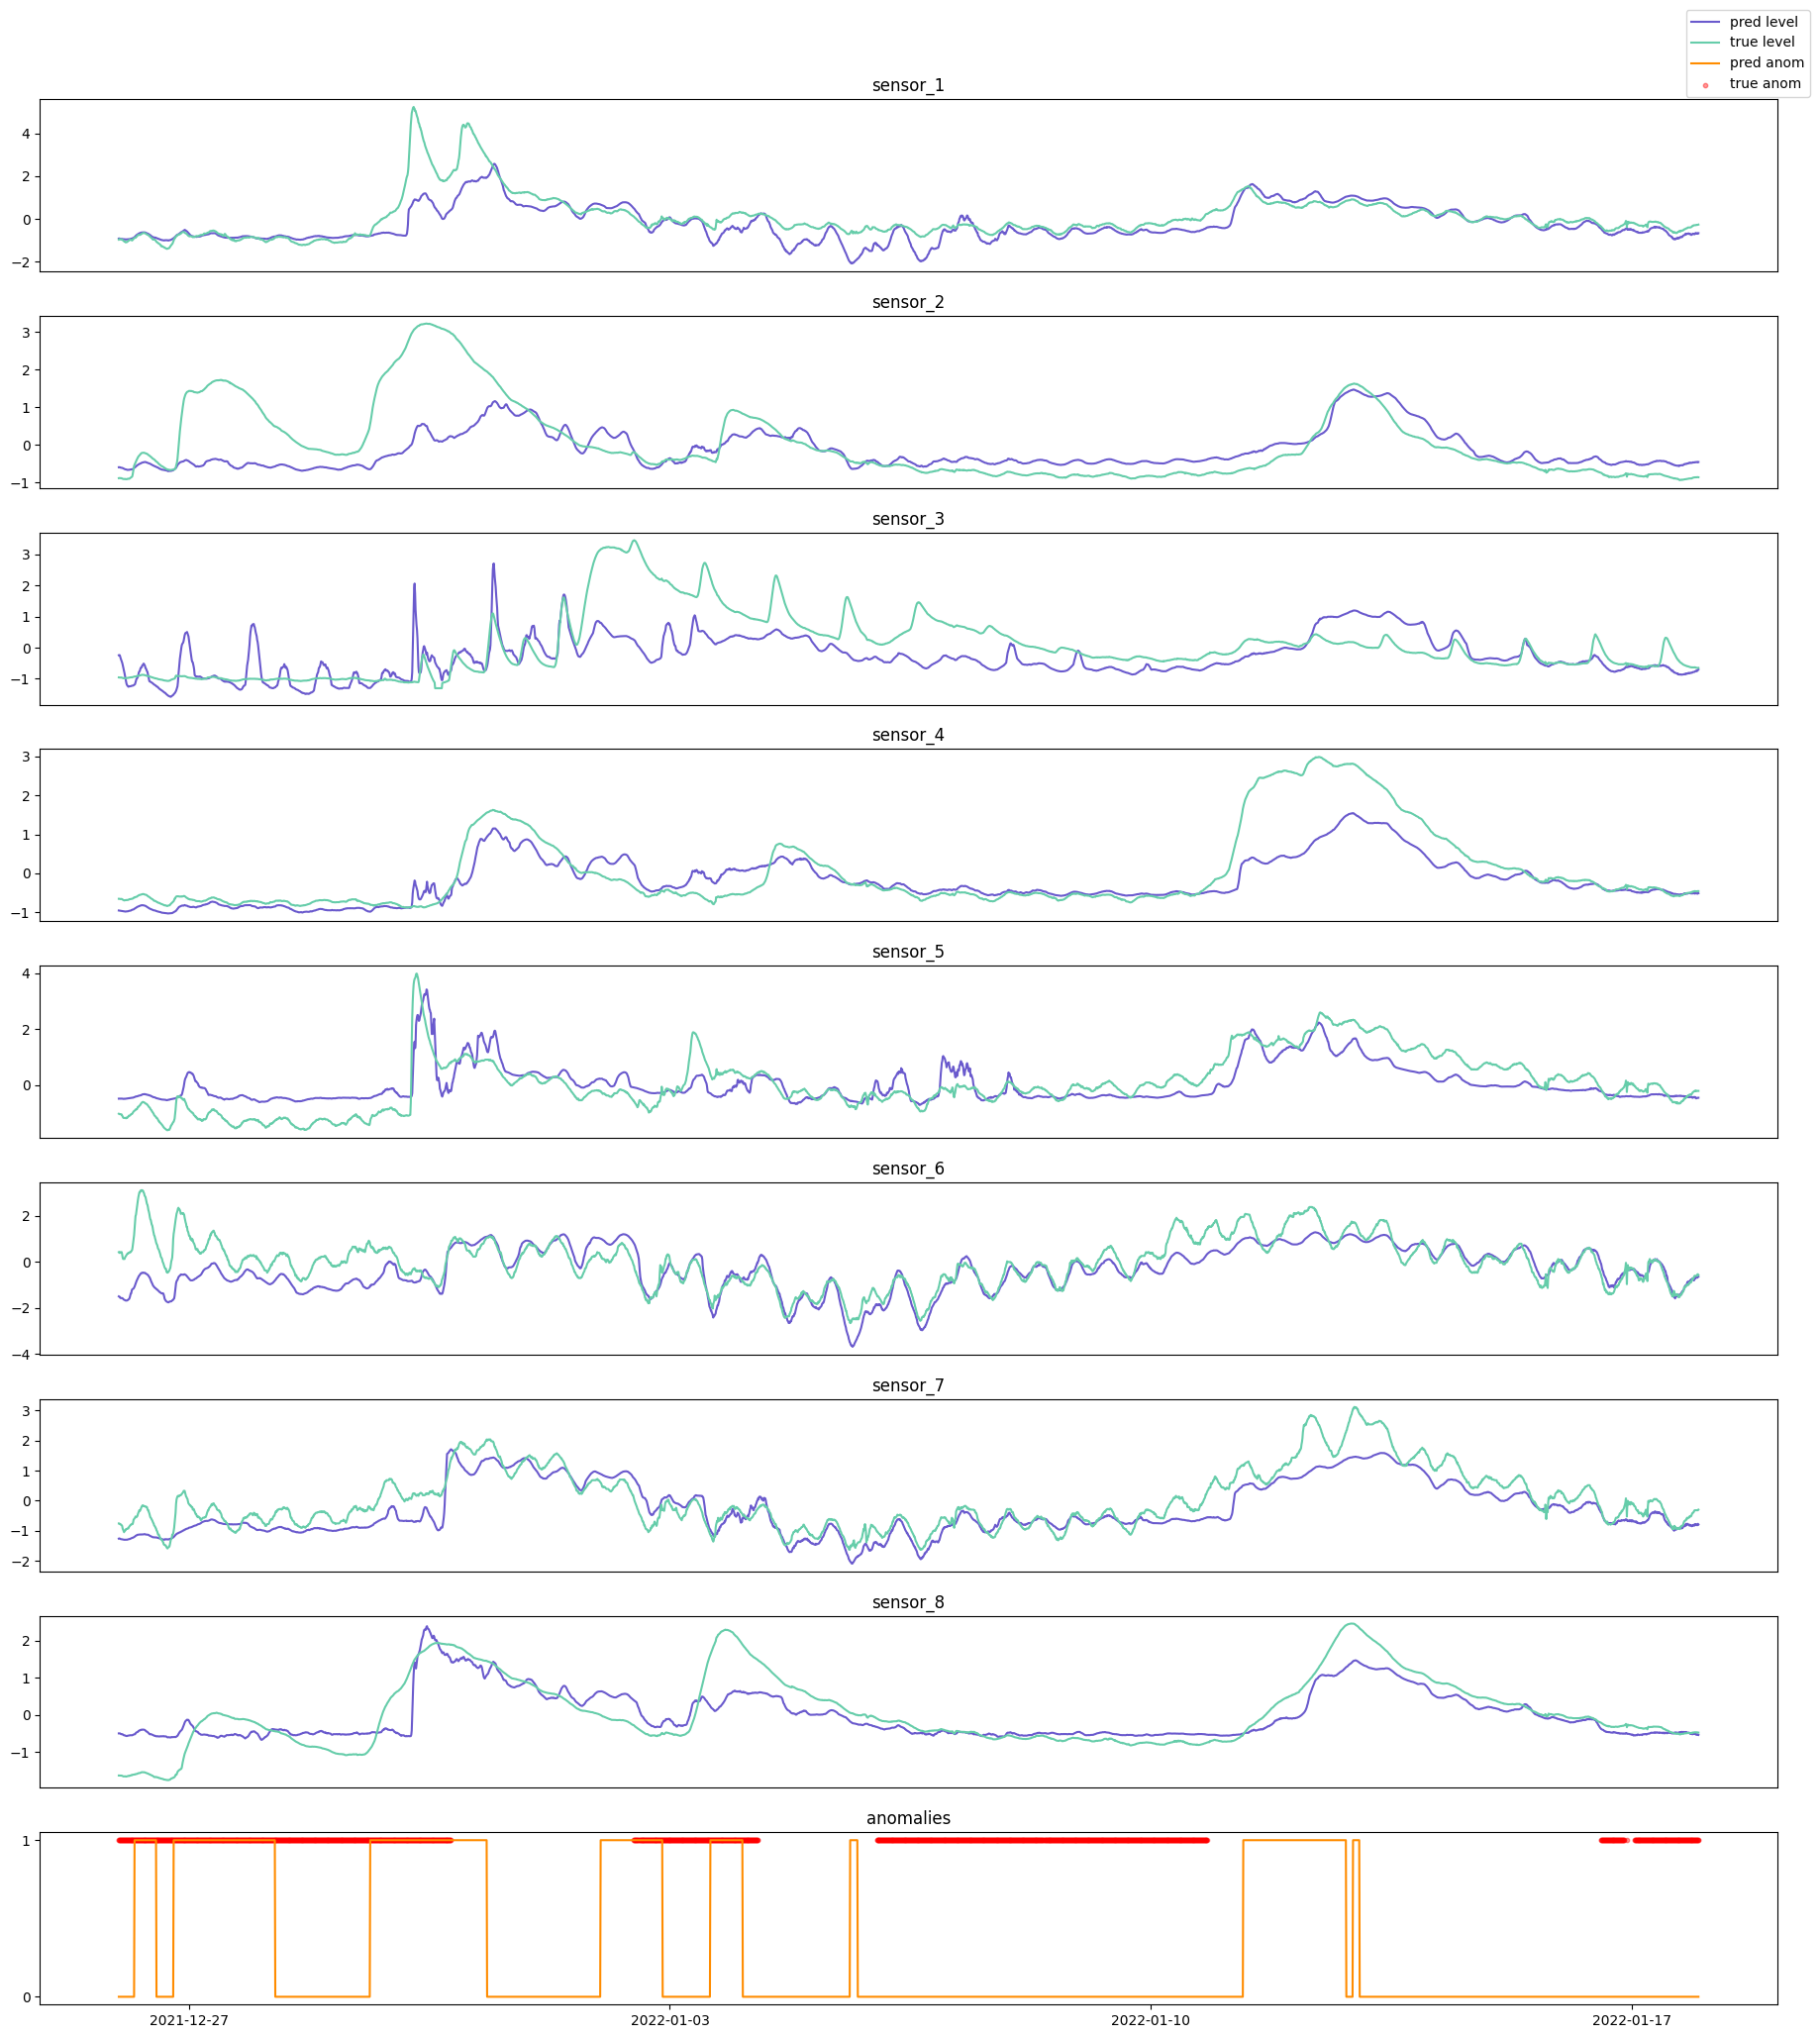

In [7]:
# plot predictions
plot_predictions(fitted_model, X_test, ANOMS, preds = preds, figsize=(20, 20))


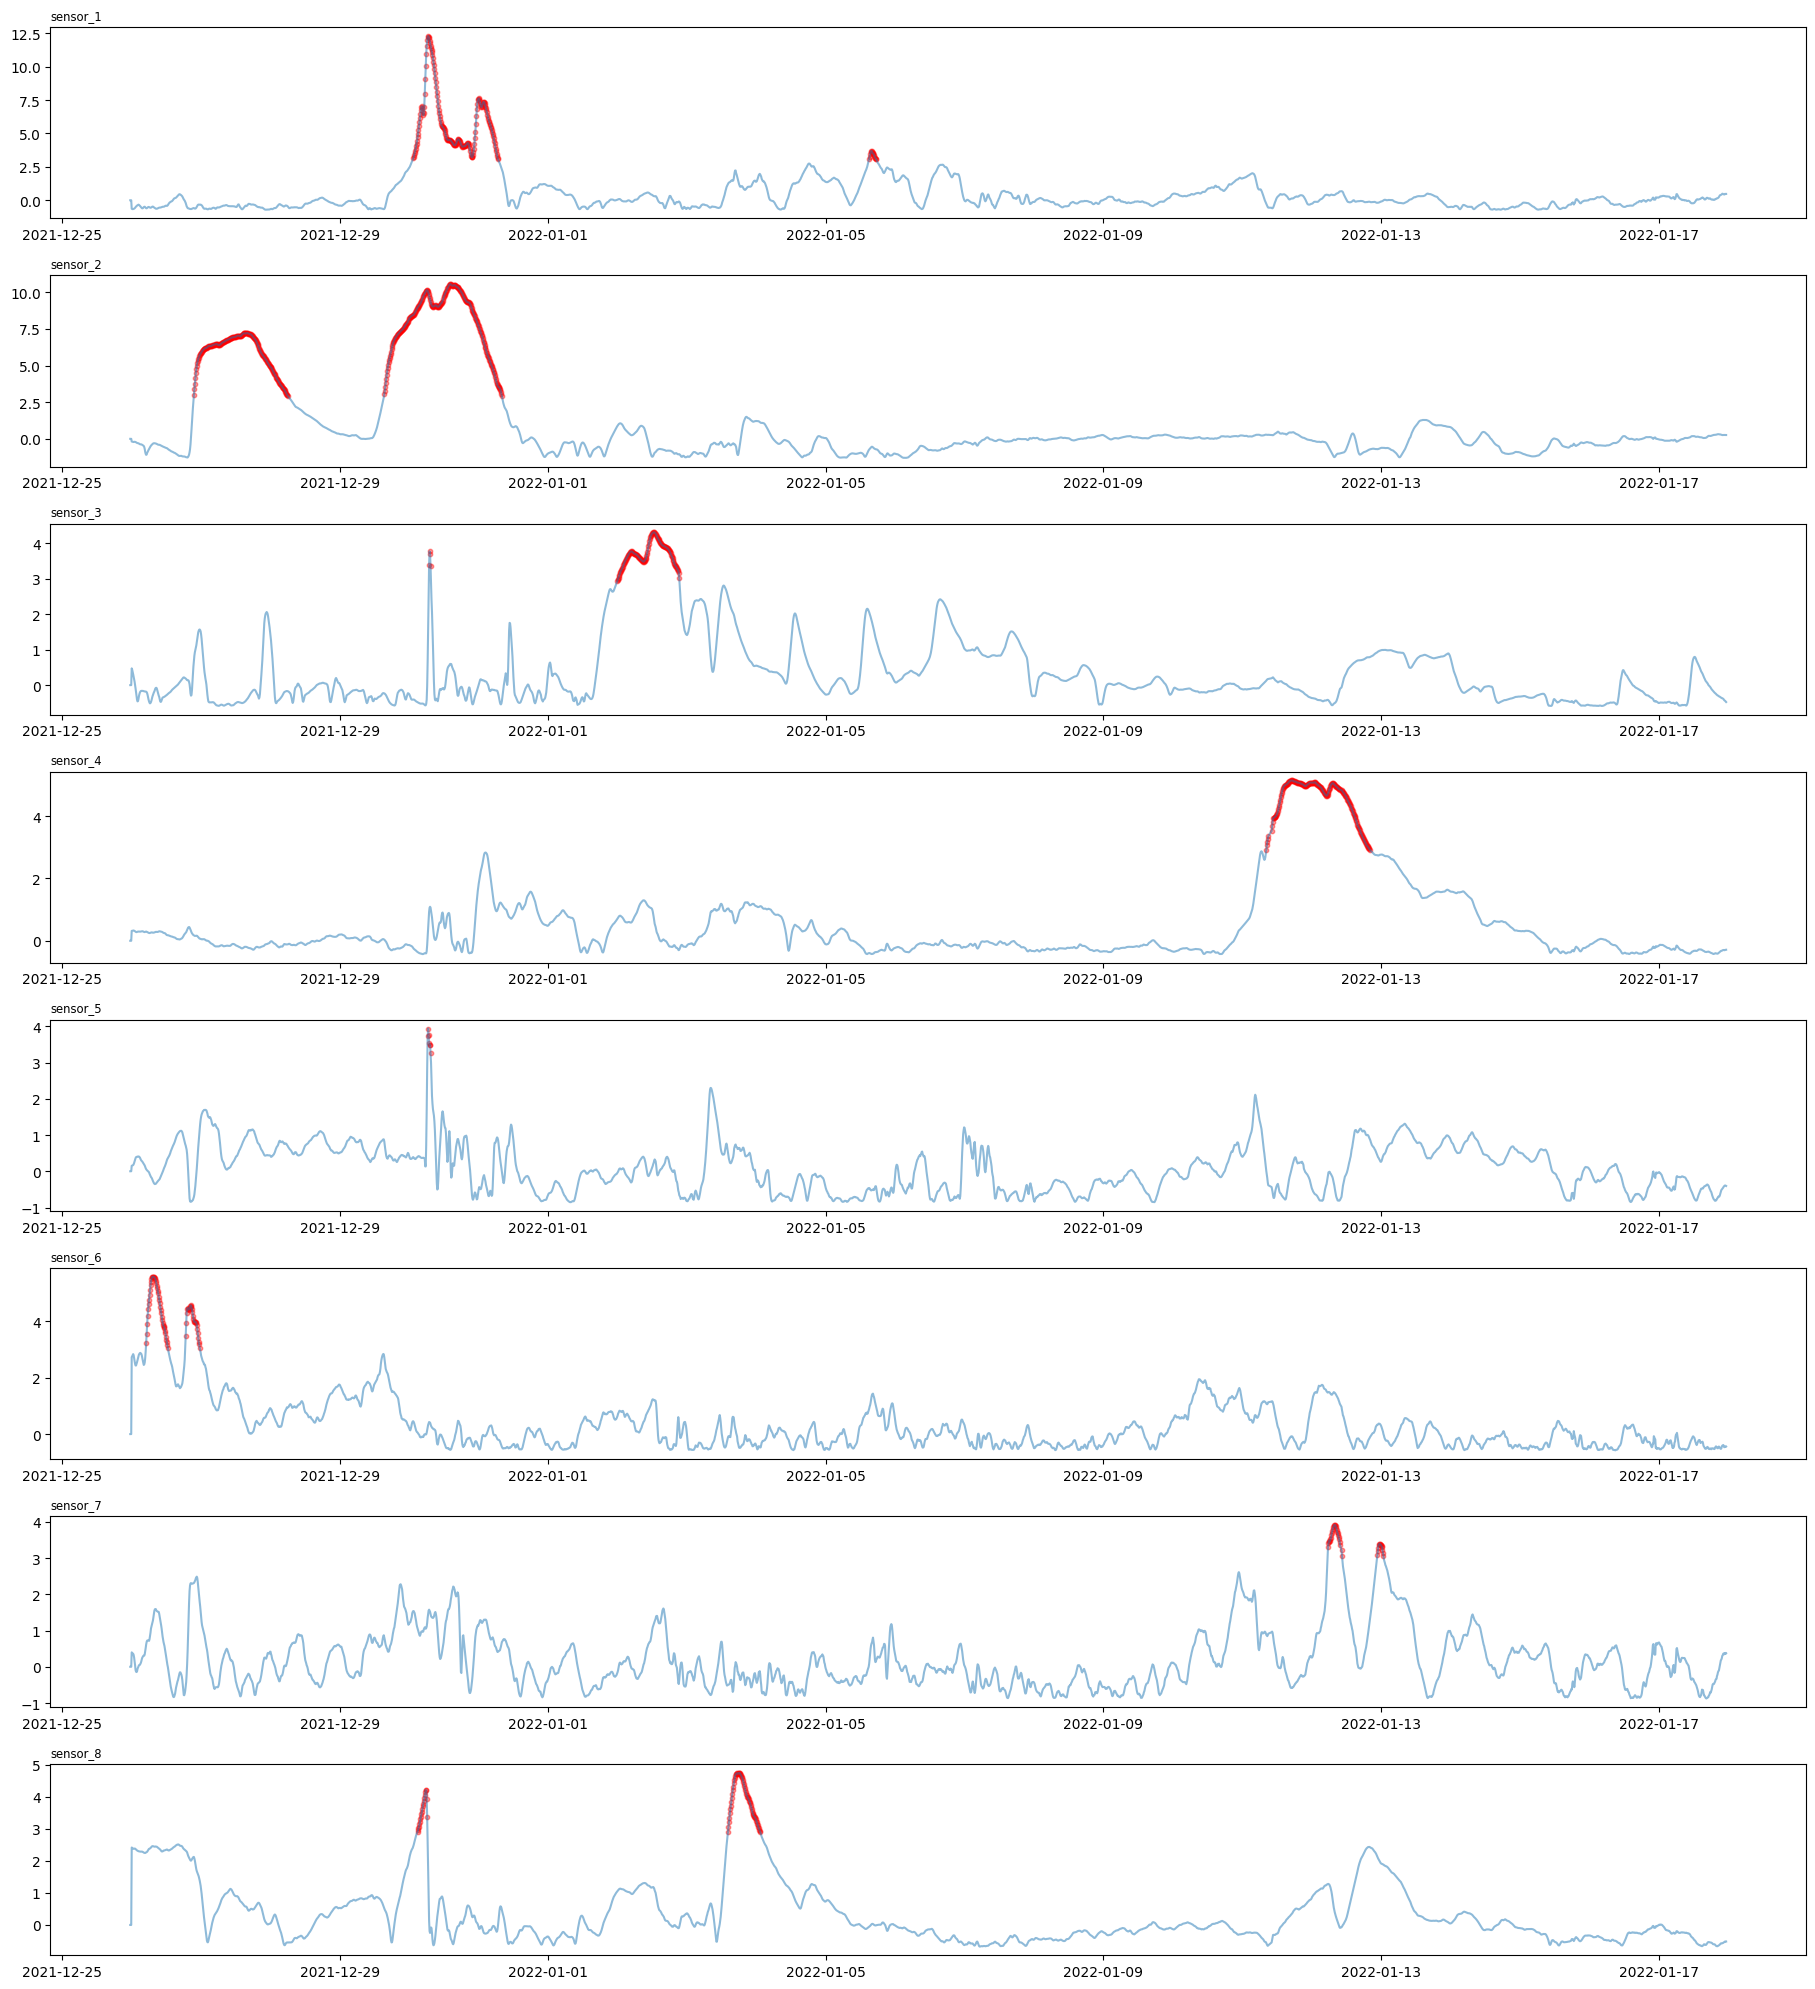

In [10]:
plot_sensor_error_scores(fitted_model, X_test)